In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data = pd.read_csv('data.csv')
data.head()
" MAIN ENERGY\n (kwh)"
"Efficiency\n[Kg/unit]"

'Efficiency\n[Kg/unit]'

In [ ]:
data.drop("Unnamed: 4",axis=1,inplace=True)

In [ ]:
for i in data.drop('Time\n',axis=1).columns:
  if data[i].dtypes == "object":
    for j in range(len(data[i].unique())):
      data[i].replace(data[i].unique()[j],j,inplace=True)

In [ ]:
co_mat = data.corr()

<ipython-input-56-896ba7922cdc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co_mat = data.corr()


<Axes: >

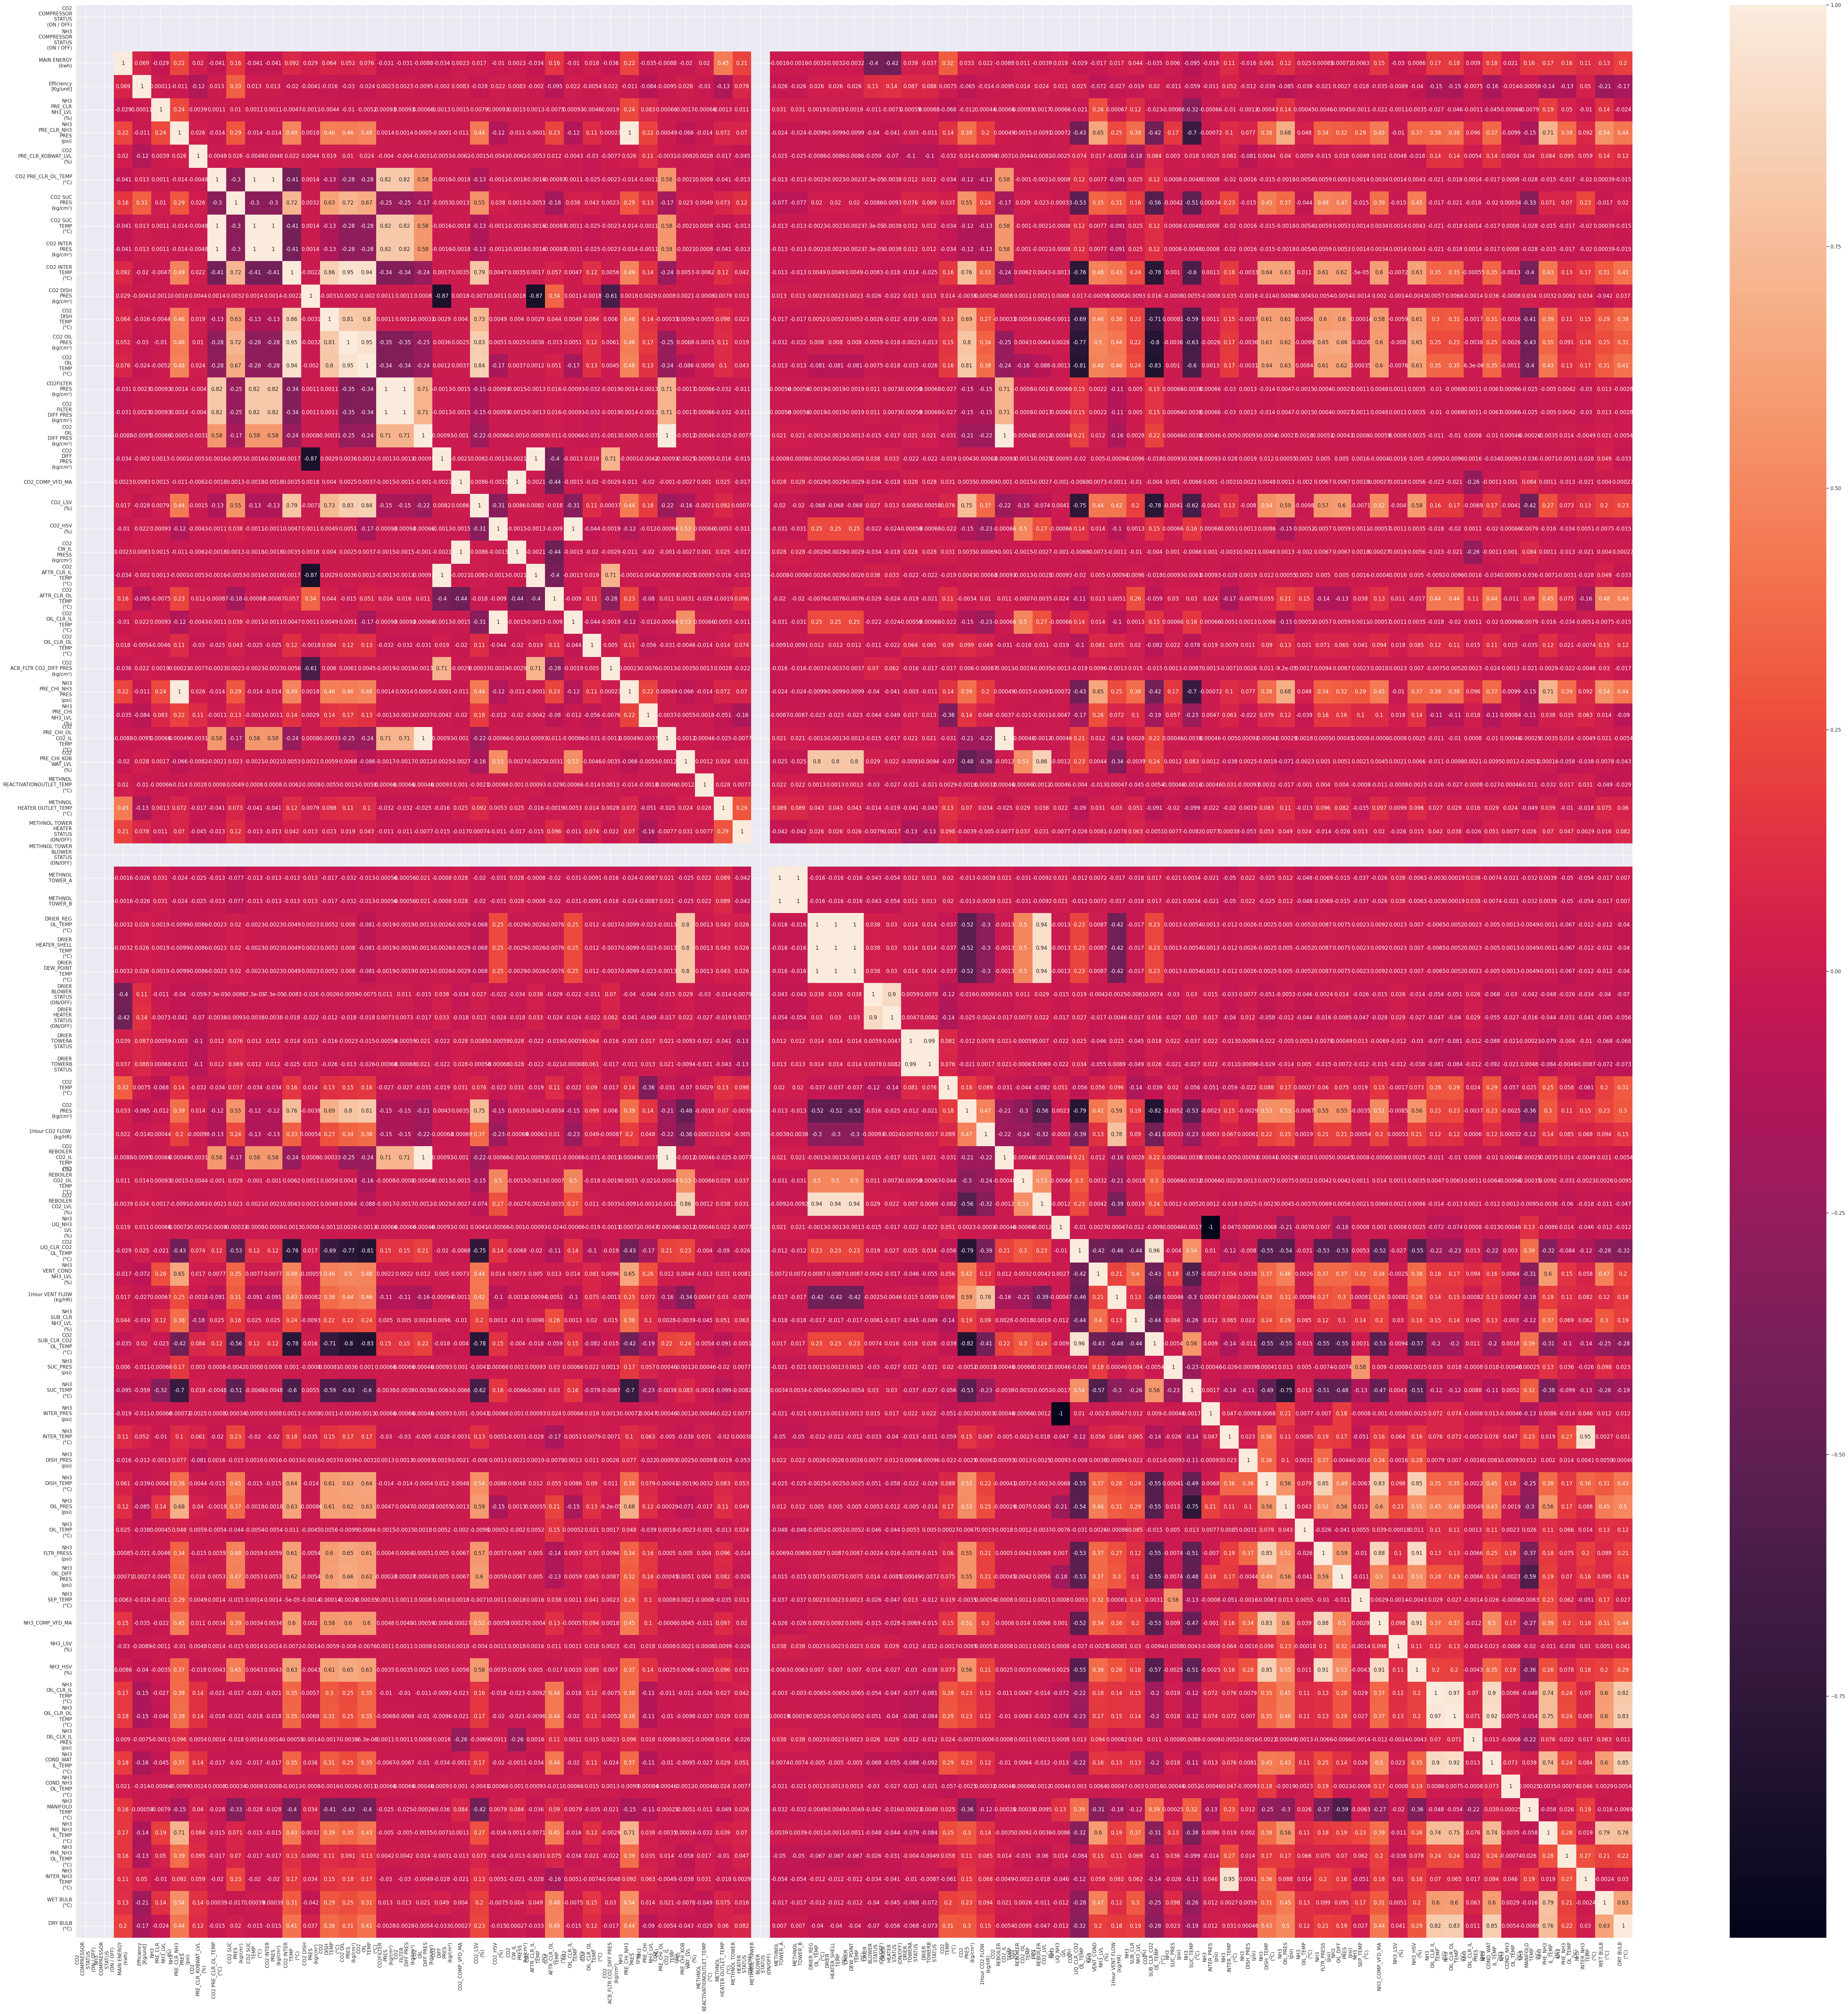

In [ ]:
plt.figure(figsize=(80,80))
sns.heatmap(co_mat,annot=True)

In [ ]:
upper_tri = co_mat.where(np.triu(np.ones(co_mat.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(to_drop)

['CO2 SUC\nTEMP\n(°C)', 'CO2 INTER\nPRES\n(kg/cm²)', 'CO2\nDISH\nTEMP\n(°C)', 'CO2 OIL\nPRES\n(kg/cm²)', 'CO2\nOIL\nTEMP\n(°C)', 'CO2FILTER\nPRES\n(kg/cm²)', 'CO2\nFILTER\nDIFF PRES\n(kg/cm²)', 'CO2_LSV\n(%)', 'CO2\nCW_IL\nPRESS\n(kg/cm²)', 'CO2\nAFTR_CLR_IL\nTEMP\n(°C)', 'CO2\nOIL_CLR_IL\nTEMP\n(°C)', 'NH3\nPRE_CHI_NH3\nPRES\n(psi)', 'CO2\nPRE_CHI_OL\nCO2_IL\nTEMP\n(°C)', 'METHNOL\nTOWER_B', 'DRIER_REG\nOL_TEMP\n(°C)', 'DRIER\nHEATER_SHELL\nTEMP\n(°C)', 'DRIER\nDEW_POINT\nTEMP\n(°C)', 'DRIER\nHEATER\nSTATUS\n(ON/OFF)', 'DRIER\nTOWERB\nSTATUS', 'CO2\nPRES\n(kg/cm²)', 'CO2\nREBOILER\nCO2_IL\nTEMP\n(°C)', 'CO2\nREBOILER\nCO2_LVL\n(%)', 'CO2\nSUB_CLR_CO2\nOL_TEMP\n(°C)', 'NH3\nFLTR_PRESS\n(psi)', 'NH3_COMP_VFD_MA', 'NH3_HSV\n(%)', 'NH3\nOIL_CLR_OL\nTEMP\n(°C)', 'NH3\nCOND_WAT\nIL_TEMP\n(°C)', 'NH3\nINTER_NH3\nTEMP\n(°C)', 'DRY BULB\n(°C)']


In [ ]:
len(to_drop)

30

In [ ]:
x = data[" MAIN ENERGY\n (kwh)"]
y = data["Efficiency\n[Kg/unit]"]

In [ ]:
data['Time\n']

0               02-01-23 0:10
1               02-01-23 0:25
2               02-01-23 0:40
3               02-01-23 0:55
4               02-01-23 1:10
                ...          
2155    2-27-2023 10:55:09 PM
2156    2-27-2023 11:10:09 PM
2157    2-27-2023 11:25:09 PM
2158    2-27-2023 11:40:09 PM
2159    2-27-2023 11:55:09 PM
Name: Time\n, Length: 2160, dtype: object

In [ ]:
lst = []
for i in range(len(data['Time\n'])):
  lst.append(data['Time\n'][i].strip())

In [ ]:
for i in range(1074):
  lst[i] = lst[i].replace("23","2023",1)

In [ ]:
dates = []
for i in lst:
  dates.append(i[:10])

In [ ]:
for i in range(1074,len(dates)):
  dates[i] = dates[i].replace(lst[i][0],"02",1)

In [ ]:
for i in range(1074,len(dates)):
  dates[i] = dates[i].strip()

In [ ]:
df = pd.DataFrame()
df['time'] = dates
df['efficiency'] = x
df['energy'] = y
df.head()

time  efficiency  energy
0  02-01-2023      765.16    4.90
1  02-01-2023      770.84    5.41
2  02-01-2023      786.30    5.02
3  02-01-2023      800.76    4.83
4  02-01-2023      800.76    4.83

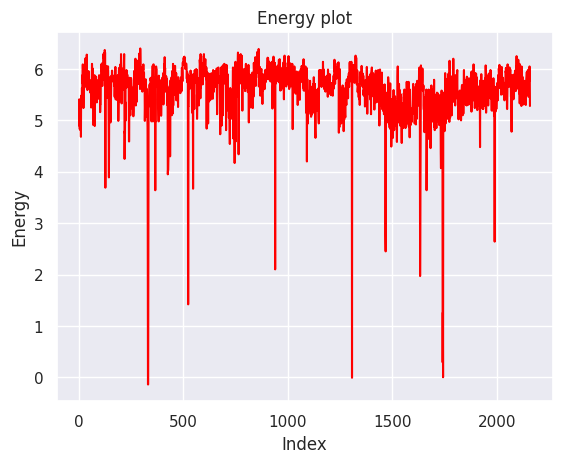

In [ ]:
plt.plot(df['energy'],color='red')
plt.title('Energy plot')
plt.xlabel('Index')
plt.ylabel('Energy')
plt.show()

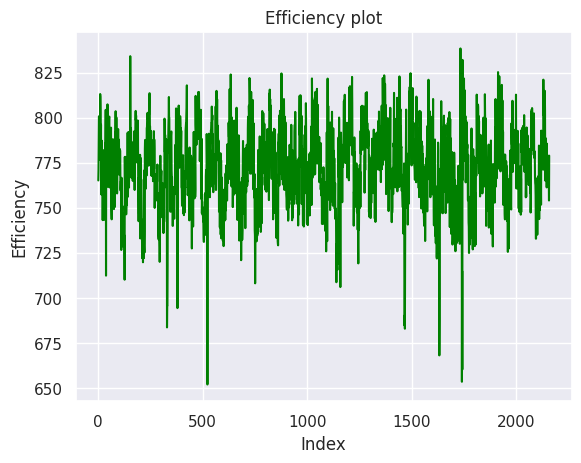

In [ ]:
plt.plot(df['efficiency'],color='green')
plt.title('Efficiency plot')
plt.xlabel('Index')
plt.ylabel('Efficiency')
plt.show()

In [ ]:
df1 = df.drop('time',axis=1)

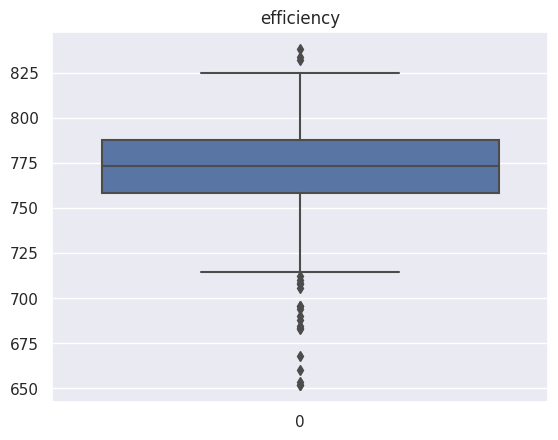

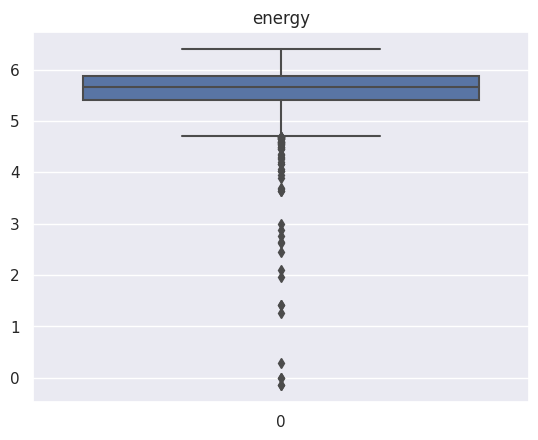

In [ ]:
for i in df1.columns:
  plt.title(i)
  sns.boxplot(df1[i])
  plt.show()

In [ ]:
df1.quantile([.1,.25,.5,.75],axis=0)

efficiency  energy
0.10     743.748    5.11
0.25     758.340    5.40
0.50     773.265    5.67
0.75     787.695    5.87

In [ ]:
def outliers1(series,name):
  new = []
  outliers = []
  q1 = series.quantile(0.25)
  q3 = series.quantile(0.75)
  iqr = q3-q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  print(f"Upper bound for {name}: {upper_bound}\n Lower bound for {name}: {lower_bound}")
  for i in series:
    if i<lower_bound or i>upper_bound:
      outliers.append(i)
    else:
      new.append(i)
  print(f"Number of outliers for {name} = {len(outliers)}")
  return outliers,new

In [ ]:
out1,new1 = outliers1(df['efficiency'],'efficiency')
out2,new2 = outliers1(df['energy'],'energy')

Upper bound for efficiency: 831.7275000000001
 Lower bound for efficiency: 714.3075
Number of outliers for efficiency = 21
Upper bound for energy: 6.574999999999999
 Lower bound for energy: 4.695
Number of outliers for energy = 57


In [ ]:
baseline_start = "02-01-2023"
baseline_end = "02-01-2023"
baseline_data = df[(df['time'] >= baseline_start) & (df['time'] <= baseline_end)]['efficiency']

In [ ]:
dfr = pd.DataFrame()
dfr['time'] = dates
dfr['efficiency'] = df['efficiency']
dfr['energy'] = df['energy']
dfr.head()

time  efficiency  energy
0  02-01-2023      765.16    4.90
1  02-01-2023      770.84    5.41
2  02-01-2023      786.30    5.02
3  02-01-2023      800.76    4.83
4  02-01-2023      800.76    4.83

In [ ]:
df2 = dfr.copy()
df2 = (pd.to_datetime(df2['time'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
print (df2)

         date  count
0  2023-02-27     96
1  2023-02-08     96
2  2023-02-18     96
3  2023-02-17     96
4  2023-02-02     96
5  2023-02-11     96
6  2023-02-26     96
7  2023-02-05     96
8  2023-02-07     95
9  2023-02-09     95
10 2023-02-06     95
11 2023-02-23     95
12 2023-02-04     95
13 2023-02-03     95
14 2023-02-19     95
15 2023-02-20     95
16 2023-02-21     94
17 2023-02-22     94
18 2023-02-01     94
19 2023-02-16     93
20 2023-02-10     92
21 2023-02-24     76
22 2023-02-15     40
23 2023-02-12     29
24 2023-02-25     20


<Axes: xlabel='date'>

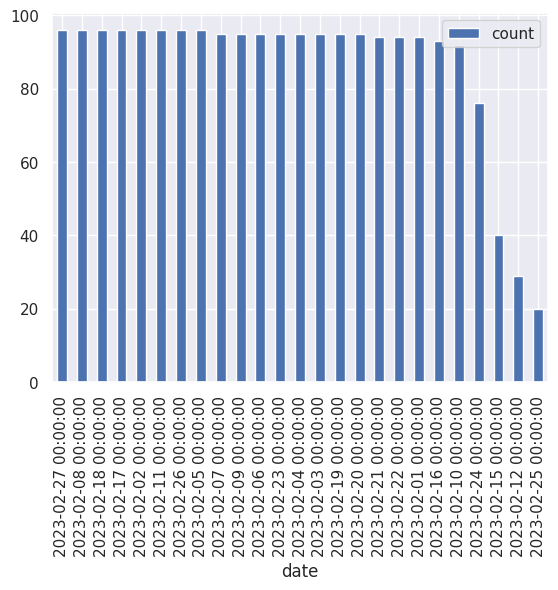

In [ ]:
df2.plot(x="date",y="count",kind='bar')

In [ ]:
import scipy.stats as stats

In [ ]:
base_data  = pd.DataFrame()
time = []
eff = []
en = []
base = '02-01-2023'
for i in range(len(df)):
  if dfr.iloc[i]["time"][:10]==base:
    time.append(dfr.iloc[i]["time"])
    eff.append(dfr.iloc[i]['efficiency'])
    en.append(dfr.iloc[i]['energy'])
base_data['time'] = time
base_data['efficiency'] = eff
base_data['energy'] = en
base_data

time  efficiency  energy
0   02-01-2023      765.16    4.90
1   02-01-2023      770.84    5.41
2   02-01-2023      786.30    5.02
3   02-01-2023      800.76    4.83
4   02-01-2023      800.76    4.83
..         ...         ...     ...
89  02-01-2023      788.08    5.76
90  02-01-2023      757.95    5.45
91  02-01-2023      776.54    5.57
92  02-01-2023      776.54    5.57
93  02-01-2023      776.66    5.69

[94 rows x 3 columns]

In [ ]:
def paired(series):
  dfs = series.copy()

  # Set the significance level
  alpha = 0.05

  # Extract the paired observations
  observations1 = dfs["efficiency"]
  observations2 = dfs["energy"]

  # Calculate the differences between paired observations
  differences = np.array(observations2) - np.array(observations1)

  # Calculate the sample size
  n = len(differences)

  # Calculate the mean and standard deviation of the differences
  mean_diff = np.mean(differences)
  std_diff = np.std(differences, ddof=1)

  # Calculate the standard error of the mean difference
  se_diff = std_diff / np.sqrt(n)

  # Calculate the t-statistic
  t_statistic = mean_diff / se_diff

  # Set the degrees of freedom
  df = n - 1

  # Calculate the critical t-value for the given alpha and degrees of freedom
  critical_t = np.abs(t_statistic) > np.abs(np.round(np.percentile(np.abs(t_statistic), (alpha/2) * 100), decimals=2))

  # Calculate the p-value (two-tailed test)
  p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=df))

  # Print the results
  print(f"Paired t-test Results for {dfs['time'][0][:10]}:")
  print("Mean Difference:", mean_diff)
  print("Standard Deviation of Differences:", std_diff)
  print("t-statistic:", t_statistic)
  print("p-value:", p_value)
  print("Reject Null Hypothesis:", p_value < alpha)
  print("****************************************")

In [ ]:
for j in df['time'].unique():
  base_data  = pd.DataFrame()
  time = []
  eff = []
  en = []
  base = j
  for i in range(len(df)):
    if dfr.iloc[i]["time"][:10]==base:
      time.append(dfr.iloc[i]["time"])
      eff.append(dfr.iloc[i]['efficiency'])
      en.append(dfr.iloc[i]['energy'])
  base_data['time'] = time
  base_data['efficiency'] = eff
  base_data['energy'] = en
  paired(base_data)

Paired t-test Results for 02-01-2023:
Mean Difference: -772.2137234042556
Standard Deviation of Differences: 18.754661699149732
t-statistic: -399.2015396083619
p-value: 0.0
Reject Null Hypothesis: True
****************************************
Paired t-test Results for 02-02-2023:
Mean Difference: -766.1188541666667
Standard Deviation of Differences: 21.631211216047188
t-statistic: -347.017142274842
p-value: 0.0
Reject Null Hypothesis: True
****************************************
Paired t-test Results for 02-03-2023:
Mean Difference: -764.1616842105263
Standard Deviation of Differences: 22.556960696349645
t-statistic: -330.1919475077229
p-value: 0.0
Reject Null Hypothesis: True
****************************************
Paired t-test Results for 02-04-2023:
Mean Difference: -757.5472631578948
Standard Deviation of Differences: 26.366968029493066
t-statistic: -280.03437377455776
p-value: 0.0
Reject Null Hypothesis: True
****************************************
Paired t-test Results for 02

Paired-T test

In [ ]:
#Splitting the dataset of 200 chunks
# and appending 100 each to each list for conducting paired-t test
data1 = []
data2 = []

In [ ]:
import pandas as pd

csv_file = 'onData.csv'

# Specify the column for which you want to calculate the average
column_name = ' MAIN ENERGY'

# Create a generator object to read the CSV file in chunks
data_generator = pd.read_csv(csv_file, chunksize=200)


# Iterate over the chunks of data
for chunk in data_generator:


    data = chunk[column_name]
    data1.append(list(data[:100]))
    data2.append(list(data[100:]))


len(data1), len(data2)

(11, 11)

In [ ]:
import math
from scipy.stats import t

def paired_t_test(before, after):
    # Calculate the differences between paired observations
    differences = [after[i] - before[i] for i in range(len(before))]

    # Calculate the mean of the differences
    mean_difference = sum(differences) / len(differences)

    # Calculate the standard deviation of the differences
    sum_squared_diff = sum((d - mean_difference) ** 2 for d in differences)
    variance = sum_squared_diff / (len(differences) - 1)
    std_deviation = math.sqrt(variance)

    # Calculate the standard error of the mean difference
    std_error = std_deviation / math.sqrt(len(differences))

    # Calculate the t-statistic
    t_statistic = mean_difference / std_error

    # Calculate the degrees of freedom
    degrees_of_freedom = len(differences) - 1

    # Calculate the critical value for a specific significance level (e.g., 0.05)
    critical_value = 2.262

    # Calculate the p-value
    p_value = 2 * (1 - t.cdf(abs(t_statistic), degrees_of_freedom))

    # Return the t-statistic and p-value
    return t_statistic, p_value, std_deviation


for i in range(len(data1)):
    if len(data1[i]) != len(data2[i]):
        break
    # Perform the paired t-test
    t_statistic, p_value, std_deviation = paired_t_test(data1[i], data2[i])

    # Print the t-statistic and p-value
    print(f"Paired t-test results: sample {i+1}\n")
    print(f"Standard Deviation: {std_deviation}")
    print("T-statistic:", t_statistic)
    alpha = 0.05

    # Define the degrees of freedom
    degrees_of_freedom = len(data1)

    # Calculate the critical t-value
    t_critical = t.ppf(1 - alpha/2, degrees_of_freedom)

    # Print the critical t-value
    print(f"Critical t-value: {t_critical}")
    print(f"Null Hypothesis is {t_statistic==t_critical} \n")
    print("********************************************************************")

Paired t-test results: sample 1

Standard Deviation: 26.11625978217595
T-statistic: -3.109863383095552
Critical t-value: 2.200985160082949
Null Hypothesis is False 

********************************************************************
Paired t-test results: sample 2

Standard Deviation: 34.96592045654936
T-statistic: 0.8069571637635817
Critical t-value: 2.200985160082949
Null Hypothesis is False 

********************************************************************
Paired t-test results: sample 3

Standard Deviation: 33.48167740509108
T-statistic: -1.8709934762848737
Critical t-value: 2.200985160082949
Null Hypothesis is False 

********************************************************************
Paired t-test results: sample 4

Standard Deviation: 29.123149989191237
T-statistic: 0.8534791054273015
Critical t-value: 2.200985160082949
Null Hypothesis is False 

********************************************************************
Paired t-test results: sample 5

Standard Deviation: 24.64

In [ ]:
#Splitting the dataset of 200 chunks
# and appending 100 each to each list for conducting paired-t test
data1 = []
data2 = []

In [ ]:
import pandas as pd

csv_file = 'onData.csv'

# Specify the column for which you want to calculate the average
column_name = 'Efficiency'

# Create a generator object to read the CSV file in chunks
data_generator = pd.read_csv(csv_file, chunksize=200)


# Iterate over the chunks of data
for chunk in data_generator:


    data = chunk[column_name]
    data1.append(list(data[:100]))
    data2.append(list(data[100:]))


len(data1), len(data2)

(11, 11)

In [ ]:
import math
from scipy.stats import t

def paired_t_test(before, after):
    # Calculate the differences between paired observations
    differences = [after[i] - before[i] for i in range(len(before))]

    # Calculate the mean of the differences
    mean_difference = sum(differences) / len(differences)

    # Calculate the standard deviation of the differences
    sum_squared_diff = sum((d - mean_difference) ** 2 for d in differences)
    variance = sum_squared_diff / (len(differences) - 1)
    std_deviation = math.sqrt(variance)

    # Calculate the standard error of the mean difference
    std_error = std_deviation / math.sqrt(len(differences))

    # Calculate the t-statistic
    t_statistic = mean_difference / std_error

    # Calculate the degrees of freedom
    degrees_of_freedom = len(differences) - 1

    # Calculate the critical value for a specific significance level (e.g., 0.05)
    critical_value = 2.262

    # Calculate the p-value
    p_value = 2 * (1 - t.cdf(abs(t_statistic), degrees_of_freedom))

    # Return the t-statistic and p-value
    return t_statistic, p_value, std_deviation


for i in range(len(data1)):
    if len(data1[i]) != len(data2[i]):
        break
    # Perform the paired t-test
    t_statistic, p_value, std_deviation = paired_t_test(data1[i], data2[i])

    # Print the t-statistic and p-value
    print(f"Paired t-test results: sample {i+1}\n")
    print(f"Standard Deviation: {std_deviation}")
    print("T-statistic:", t_statistic)
    alpha = 0.05

    # Define the degrees of freedom
    degrees_of_freedom = len(data1)

    # Calculate the critical t-value
    t_critical = t.ppf(1 - alpha/2, degrees_of_freedom)

    # Print the critical t-value
    print(f"Critical t-value: {t_critical}")
    print(f"Null Hypothesis is {t_statistic==t_critical} \n")
    print("********************************************************************")

Paired t-test results: sample 1

Standard Deviation: 0.5275833506842229
T-statistic: 2.321907995033007
Critical t-value: 2.200985160082949
Null Hypothesis is False 

********************************************************************
Paired t-test results: sample 2

Standard Deviation: 1.0821554015626926
T-statistic: -2.978315309747388
Critical t-value: 2.200985160082949
Null Hypothesis is False 

********************************************************************
Paired t-test results: sample 3

Standard Deviation: 0.807074627618447
T-statistic: 1.6504049990154295
Critical t-value: 2.200985160082949
Null Hypothesis is False 

********************************************************************
Paired t-test results: sample 4

Standard Deviation: 0.5296756678679067
T-statistic: -1.7652311720559832
Critical t-value: 2.200985160082949
Null Hypothesis is False 

********************************************************************
Paired t-test results: sample 5

Standard Deviation: 0.48